# RBE/CS549 Fall 2022: Computer Vision
## Homework 0: Alohomora

Author(s): 
Prof. Nitin J. Sanket (nsanket@wpi.edu), Lening Li (lli4@wpi.edu), Gejji, Vaishnavi Vivek (vgejji@wpi.edu)

Robotics Engineering Department,

Worcester Polytechnic Institute

Code adapted from CMSC733 at the University of Maryland, College Park.


## Phase 1




### Get the BSDS500 dataset

In [1]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/BSDS500.tar.xz
!tar -xvf BSDS500.tar.xz
!mv BSDS500/ /content/data/

--2023-01-22 15:55:24--  https://raw.githubusercontent.com/leelening/rbe549/main/hw0/BSDS500.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 812060 (793K) [application/octet-stream]
Saving to: ‘BSDS500.tar.xz.1’

BSDS500.tar.xz.1    100%[===================>] 793.03K  --.-KB/s    in 0.06s   

2023-01-22 15:55:25 (13.7 MB/s) - ‘BSDS500.tar.xz.1’ saved [812060/812060]

BSDS500/
BSDS500/CannyBaseline/
BSDS500/CannyBaseline/1.png
BSDS500/CannyBaseline/10.png
BSDS500/CannyBaseline/2.png
BSDS500/CannyBaseline/3.png
BSDS500/CannyBaseline/4.png
BSDS500/CannyBaseline/5.png
BSDS500/CannyBaseline/6.png
BSDS500/CannyBaseline/7.png
BSDS500/CannyBaseline/8.png
BSDS500/CannyBaseline/9.png
BSDS500/GroundTruth/
BSDS500/GroundTruth/1.png
BSDS500/GroundTruth/10.png
BSDS

In [2]:
!wget https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
!tar -xvf TxtFiles.tar.xz
!mv TxtFiles/ /content/data/

--2023-01-22 15:55:26--  https://raw.githubusercontent.com/leelening/rbe549/main/hw0/TxtFiles.tar.xz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55376 (54K) [application/octet-stream]
Saving to: ‘TxtFiles.tar.xz.1’

TxtFiles.tar.xz.1   100%[===================>]  54.08K  --.-KB/s    in 0.02s   

2023-01-22 15:55:26 (3.04 MB/s) - ‘TxtFiles.tar.xz.1’ saved [55376/55376]

TxtFiles/
TxtFiles/DirNamesTest.txt
TxtFiles/DirNamesTrain.txt
TxtFiles/LabelsTest.txt
TxtFiles/LabelsTrain.txt
mv: cannot move 'TxtFiles/' to '/content/data/': No such file or directory


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1. Generate Difference of Gaussian Filter Bank: (DoG)
2. Display all the filters in this filter bank and save image as DoG.png,
3. use command "cv2.imwrite(...)"

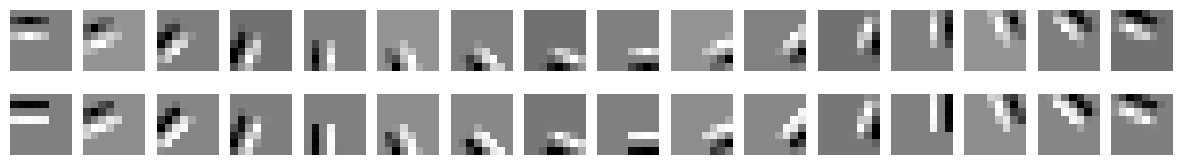

<Figure size 640x480 with 0 Axes>

In [2]:

sigma_scales = [1, 1.4]
angles = 16
filter_size= 8
center = (int(filter_size/2), int(filter_size/2))
bound = (filter_size - 1) / 2
deviation = np.linspace(-bound, bound, filter_size)
x, y = np.meshgrid(deviation, deviation)
pts = [x.flatten(), y.flatten()]

def gauss2d(n,sigma):
    size = int((n-1)/2)
    var = sigma**2
    m = np.asarray([[x**2 + y**2 for x in range(-size,size+1)] for y in range(-size,size+1)])
    output = (1/np.sqrt(2*np.pi*var))*np.exp(-m/(2*var))
    return output

def DOG_filter_bank():    
    sobel_x = np.asarray([[1, 2, 1],
                        [0, 0, 0],
                        [-1,-2,-1]])

    DoGs = []
    o = 16
    sigma = [1,3]
    orientation = np.arange(0, 360,360/o)
    plt.figure(figsize=(15,2))
    for i in range(0,2):
        g_conv = cv2.filter2D(src=gauss2d(5,sigma[i]), ddepth = -1, kernel=sobel_x)
        for j in range(0,o):
            rotation_mat = cv2.getRotationMatrix2D(center=center, angle=orientation[j], scale=1)
            dog_filter = cv2.warpAffine(g_conv, rotation_mat, (filter_size,filter_size))
            DoGs.append(dog_filter)
            plt.subplot(2,16,o*(i)+j+1)
            plt.axis('off')
            plt.imshow(DoGs[o*(i)+j],cmap='gray')
            

    plt.show()
    plt.savefig("DoG_filter_bank")
    
    return DoGs

D = DOG_filter_bank()


1. Generate Leung-Malik Filter Bank: (LM)
2. Display all the filters in this filter bank and save image as LM.png,
3. use command "cv2.imwrite(...)"


In [3]:
def gauss1d(sigma, mean,x, order):
    x = np.array(x) - mean
    var = sigma**2
    g = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x*x)/(2*var)))
    
    if order == 0:
        return g
    elif order == 1:
        g = -g*((x)/(var))
        return g
    else:
        g = g*(((x*x) - var)/(var**2))
        return g

def gaussianfilter(scale, phasex, phasey, pts, sup):
    gx = gauss1d(3*scale, 0,pts[0,...], phasex)
    gy = gauss1d(scale, 0,pts[1,...], phasey)
    image = gx*gy
    image = np.reshape(image,(sup,sup))
    return image

def log2d(n,sigma):
    size = int((n-1)/2)
    var = sigma**2
    m = np.asarray([[x**2 + y**2 for x in range(-size,size+1)] for y in range(-size,size+1)])
    n = (1/np.sqrt(2*np.pi*var))*np.exp(-m/(2*var))
    output = n*(m - var)/(var**2)
    return output

def LM_filter_bank():
    sup     = 49
    scalex  = np.sqrt(2) * np.array([1,2,3])
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv
    F     = np.zeros([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)
    
    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = [[c,-s],[s,c]]
            rotpts = np.array(rotpts)
            rotpts = np.dot(rotpts,orgpts)
            F[:,:,count] = gaussianfilter(scalex[scale],0, 1, rotpts, sup)
            F[:,:,count+nedge] = gaussianfilter(scalex[scale],0, 2, rotpts, sup)
            count = count + 1
            
    count = nbar+nedge
    
    scales = np.sqrt(2) * np.array([1,2,3,4])
    
    for i in range(len(scales)):
        F[:,:,count]   = gauss2d(sup, scales[i])
        count = count + 1
        
    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, scales[i])
        count = count + 1
        
    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, 3*scales[i])
        count = count + 1
        
    return F

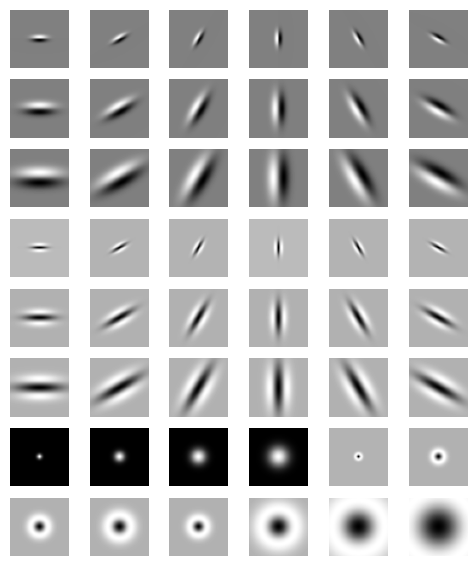

<Figure size 640x480 with 0 Axes>

In [130]:
L = LM_filter_bank()
plt.figure(figsize=(6,8))
for i in range(0,48):
    plt.subplot(9,6,i+1)
    plt.axis('off')
    plt.imshow(L[:,:,i], cmap = 'gray')
    
plt.show()
plt.savefig("LM_filter_bank.jpg")

In [5]:



# def binary(img,bin_value):
#     binary_img = img * 0
#     for r in range(0,img.shape[0]):
#         for c in range(0,img.shape[1]):
#             if img[r, c]==bin_value:
#                 binary_img[r, c] = 1   
#             else:
#                 binary_img[r, c] = 0
#     return binary_img

# def gradient(maps,numbins,mask_l,mask_r):
#     gradient = np.zeros((maps.shape[0],maps.shape[1],12))
#     for m in range(0,12):
#         chi = np.zeros((maps.shape))
#         for i in range(1,numbins):
#             tmp = binary(maps,i)
#             g = convolve2d(tmp, mask_l[m],'same')
#             h = convolve2d(tmp, mask_r[m],'same')
#             chi = chi + ((g-h)**2) / (g+h+0.0001)
#         gradient[:,:,m] = chi
#     return gradient

1. Generate Gabor Filter Bank: (Gabor)
2. Display all the filters in this filter bank and save image as Gabor.png,
3. use command "cv2.imwrite(...)"


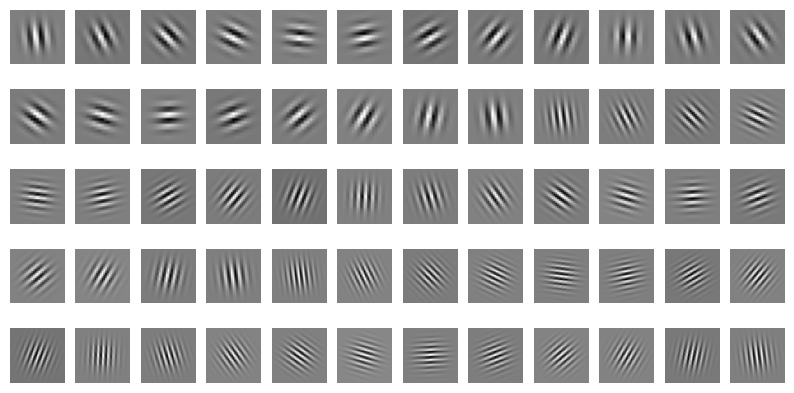

In [6]:
import skimage.transform
def Gabor_filter_bank(sigma, theta, Lambda, psi, gamma,num_filters):
    g = list()
    for s in sigma:
        sigma_x = s
        sigma_y = float(s) / gamma

        nstds = 3 
        xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
        xmax = np.ceil(max(1, xmax))
        ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
        ymax = np.ceil(max(1, ymax))
        xmin = -xmax
        ymin = -ymax
        (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

        x_theta = x * np.cos(theta) + y * np.sin(theta)
        y_theta = -x * np.sin(theta) + y * np.cos(theta)

        gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)

        ang = np.linspace(0,360,num_filters)
        for i in range(num_filters):
            image = skimage.transform.rotate(gb,ang[i])
            g.append(image)
            
    r = len(g)
    plt.subplots(5, int(r/5), figsize=(10,5))
    for i in range(r):
        plt.subplot(5, int(r/5), i+1)
        plt.axis('off')
        plt.imshow(g[i],cmap='gray')
    plt.savefig('Gabor.png')
    
    return g


G = Gabor_filter_bank(sigma=[3,5,7], theta=0.25, Lambda=1, psi=1, gamma=1,num_filters=20)



1. Generate Half-disk masks
2. Display all the Half-disk masks and save image as masksMasks.png,
3. use command "cv2.imwrite(...)"

/tmp/ipykernel_5423/4194728782.py:32: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 16, i + 1)


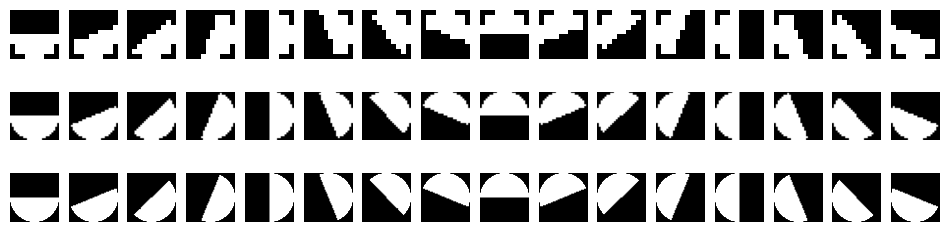

In [7]:


def half_disk_masks(sizes, angles):

    half_disks = []
    for size in sizes:
        
        bound = (size - 1) / 2
        spread = np.linspace(-bound, bound, size)
        x, y = np.meshgrid(spread, spread)
        pts = [x.flatten(), y.flatten()]

        radius = size / 2
        for i in range(angles):
            angle = (2 * np.pi * i)/angles
            rot = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle), np.cos(angle)]])
            rot_pts = np.dot(rot, pts)

            x, y = rot_pts[0], rot_pts[1]

            cond1 = (x ** 2 + y ** 2) < radius ** 2
            cond2 = y > 0
            mask = np.logical_and(cond1, cond2)
            mask = mask.reshape(size, size)
            
            half_disks.append(mask)

    return half_disks

masks = half_disk_masks([10, 26, 50], 16)

plt.subplots(16, 3, figsize=(12,3))
for i in range(len(masks)):
    plt.subplot(3, 16, i + 1)
    plt.axis('off')
    plt.imshow(masks[i], cmap='gray')

1. Generate Texton Map
2. Filter image using oriented gaussian filter bank


In [117]:
import os
images_folder = "./BSDS500/Images/"
image_files = os.listdir(images_folder)

results_folder = "./Results/"
if not os.path.exists(results_folder):
    os.mkdir("Results")
    
# sample image
img_name = '10.jpg'

img_path = images_folder + img_name
img = cv2.imread(img_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [118]:
   
imgs = []
for filt in [*D, *L, *G]:
    img_filt = cv2.filter2D(src=img_gray, ddepth=-1, kernel=filt)
    min_, max_ = np.min(img_filt), np.max(img_filt)
    diff = max_ - min_

    diff = diff if diff else 1
    img_filt = 255 * (img_filt - min_) / diff
    imgs.append(img_filt)

1. Generate texture ID's using K-means clustering
2. Display texton map and save image as TextonMap_ImageName.png,
3. use command "cv2.imwrite('...)"


In [119]:
from sklearn.cluster import KMeans

imgs = np.array(imgs)

d, w, h = imgs.shape
pixels = imgs.reshape(d, w * h).transpose()

km = KMeans(n_clusters=64, n_init=2)
labels = km.fit_predict(pixels)
texton_map = labels.reshape([w, h])

plt.imsave(results_folder + "TextonMap_" + img_name, texton_map)

In [120]:
# import sklearn


# def Texton(img, filter_bank1, filter_bank2, filter_bank3, num_clusters):
#     p,q,_ = img.shape
    
#     tex_map_DoG = np.array(img)
#     num_filters1 = len(filter_bank1)
#     for i in range(num_filters1):
#         out = cv2.filter2D(img,-1,np.array(filter_bank1))
#         tex_map_DoG = np.dstack((tex_map_DoG, out))
        
#     tex_map_LM = np.array(img)
#     num_filters2 = len(filter_bank2)
#     for i in range(num_filters2):
#         out = cv2.filter2D(img,-1,np.array(filter_bank2))
#         tex_map_LM= np.dstack((tex_map_LM, out))
    
#     tex_map_Gabor = np.array(img)
#     num_filters3 = len(filter_bank1)
#     for i in range(num_filters1):
#         out = cv2.filter2D(img,-1,np.array(filter_bank1))
#         tex_map_Gabor = np.dstack((tex_map_Gabor, out))
        
#     tex_map = np.dstack((tex_map_DoG[:,:,1:],tex_map_LM[:,:,1:],tex_map_Gabor[:,:,1:]))
#     m,n,r = tex_map.shape
#     inp = np.reshape(tex_map,((p*q),r))
#     kmeans = sklearn.cluster.KMeans(n_clusters = num_clusters, random_state = 2)
#     kmeans.fit(inp)
#     labels = kmeans.predict(inp)
#     l = np.reshape(labels,(m,n))
#     plt.imshow(l)
#     return l

# for i in image_files:
#     T = Texton(cv2.imread(images_folder+i, cv2.COLOR_BGR2GRAY),D,L,G,num_clusters=64)
#     print('Maps/T'+str(i+1))
#     plt.save('Maps/T'+str(i+1),T)
#     plt.imshowow(T)
#     plt.imsave(str(i+1)+"/TextonMap_"+str(i+1)+".png", T)


1. Generate Texton Gradient (Tg)
2. Perform Chi-square calculation on Texton Map
3. Display Tg and save image as Tg_ImageName.png,
4. use command "cv2.imwrite(...)"


In [121]:

texton_bins = 64
brightness_bins = 16
color_bins = 16

masks = half_disk_masks([10, 26, 50], 16)
left_hd_masks = [*masks[0:8], *masks[16:24], *masks[32:40]]
right_hd_masks = [*masks[8:16], *masks[24:32], *masks[40:48]]
hd_masks = [left_hd_masks, right_hd_masks]


def brightness(Img, num_clusters):
    p,q,r = Img.shape
    inp = np.reshape(Img,((p*q),r))
    kmeans = sklearn.cluster.KMeans(n_clusters = num_clusters, random_state = 2)
    kmeans.fit(inp)
    labels = kmeans.predict(inp)
    l = np.reshape(labels,(p,q))
    plt.imshow(l,cmap = 'binary')
    return l

def color(Img, num_clusters):
    p,q,r = Img.shape
    inp = np.reshape(Img,((p*q),r))
    kmeans = sklearn.cluster.KMeans(n_clusters = num_clusters, random_state = 2)
    kmeans.fit(inp)
    labels = kmeans.predict(inp)
    l = np.reshape(labels,(p,q))
    plt.imshow(l)
    return l

def chi_square(img_map, bins, half_disc_masks):
	"""
	Gets gradient map using chi-squared distance calculations for given map of image.
	"""
	left_m = half_disc_masks[0]
	right_m = half_disc_masks[1]

	chi_sqr_distances = []
	for i in range(len(left_m)):
		chi_sqr_dist = np.zeros(img_map.shape)
		for val in range(bins):
			bin_img = (img_map == val)
			bin_img = np.float32(bin_img)

			gi = cv2.filter2D(src=bin_img, ddepth=-1, kernel=np.float32(left_m[i]))
			hi = cv2.filter2D(src=bin_img, ddepth=-1, kernel=np.float32(right_m[i]))

			chi_sqr_dist += ((gi - hi) ** 2 )/2 * (gi + hi)
		chi_sqr_distances.append(chi_sqr_dist)

	chi_sqr_distances = np.array(chi_sqr_distances)
	return np.mean(chi_sqr_distances, axis=0)

Tg = chi_square(texton_map, texton_bins, hd_masks)
# plt.imshow(Tg)
plt.imsave(results_folder + "Tg_" + img_name, Tg)

1. Generate Brightness Map
2. Perform brightness binning


In [122]:
img_gray = np.array(img_gray)
w, h = img_gray.shape
pixels = img_gray.reshape(w*h, 1)

km = KMeans(n_clusters=16, n_init=2)
labels = km.fit_predict(pixels)
brightness_map = labels.reshape([w, h])

plt.imsave(results_folder + "BrightnessMap_" + img_name, brightness_map)

1. Generate Brightness Gradient (Bg)
2. Perform Chi-square calculation on Brightness Map
3. Display Bg and save image as Bg_ImageName.png,
4. use command "cv2.imwrite(...)"



In [123]:

Bg = chi_square(brightness_map, brightness_bins, hd_masks)
plt.imsave(results_folder + "Bg_" + img_name, Bg)


1. Generate Color Map
2. Perform color binning or clustering


In [124]:
w, h, d = img.shape
pixels = img.reshape(w * h, d)

km = KMeans(n_clusters=16, n_init=2)
labels = km.fit_predict(pixels)
color_map = labels.reshape([w, h])

plt.imsave(results_folder + "ColorMap_" + img_name, color_map)





1. Generate Color Gradient (Cg)
2. Perform Chi-square calculation on Color Map
3. Display Cg and save image as Cg_ImageName.png,
4. use command "cv2.imwrite(...)"



In [125]:

Cg = chi_square(color_map, color_bins, hd_masks)
# plt.imshow(Cg)
plt.imsave(results_folder + "Cg_" + img_name, Cg)



1. Read Sobel Baseline
2. use command "cv2.imread(...)"


In [126]:

sobel_img = "BSDS500/SobelBaseline/10.png"
canny_img = "BSDS500/CannyBaseline/10.png"

sobel_pb = cv2.imread(sobel_img)
sobel_pb = cv2.cvtColor(sobel_pb, cv2.COLOR_BGR2GRAY)





1. Read Canny Baseline
2. use command "cv2.imread(...)"



In [127]:

canny_pb = cv2.imread(canny_img)
canny_pb = cv2.cvtColor(canny_pb, cv2.COLOR_BGR2GRAY)




1. Combine responses to get pb-lite output
2. Display PbLite and save image as PbLite_ImageName.png
3. use command "cv2.imwrite(...)"



In [128]:

pb_edges = np.array((Tg + Bg + Cg)/3) * np.array(0.5 * sobel_pb + 0.5 * canny_pb)
plt.imsave(results_folder + "PbLite_" + img_name, pb_edges, cmap='gray')